In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import FinanceDataReader as fdr
import quandl
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [2]:
api_key = "key"

In [3]:
df_cu = quandl.get("ODA/PCOPP_USD", authtoken=api_key)
df_cu = df_cu.loc['2012-01-01':,]

In [4]:
df = fdr.DataReader('103140', '2012')
df = df[['Close']]

c:\users\gus26\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
c:\users\gus26\appdata\local\programs\python\python36\lib\site-packages\matplotlib\legend.py:508: UserWarning: Automatic legend placement (loc="best") not implemented for figure legend. Falling back on "upper right".
  warnings.warn('Automatic legend placement (loc="best") not '


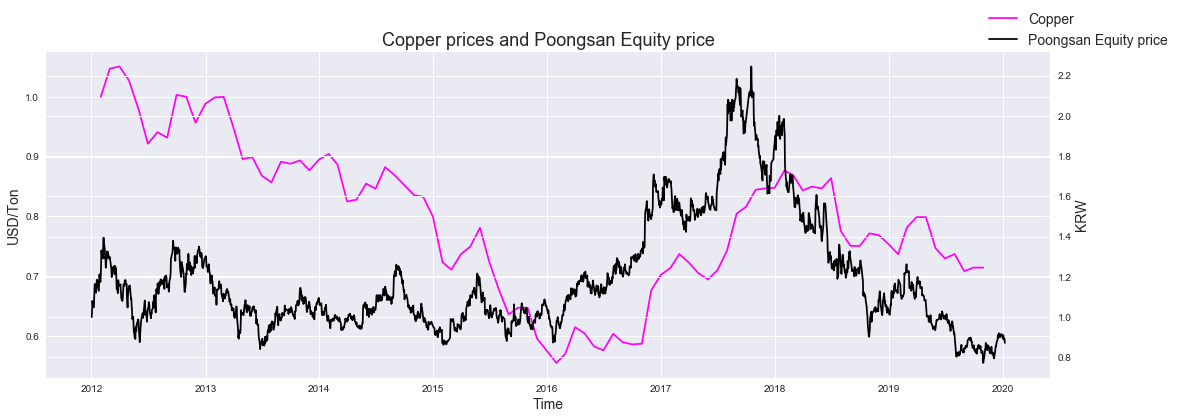

In [5]:
plt.style.use('seaborn')
fig, ax0 = plt.subplots(figsize=(18,6))
ax1 = ax0.twinx()

ax0.set_title('Copper prices and Poongsan Equity price', fontsize = 18)
ax0.plot(df_cu/df_cu.iloc[0], c = 'magenta', label='Copper')
ax0.set_ylabel("USD/Ton", fontsize = 14)
ax0.grid(True)

ax1.plot(df/df.iloc[0], c = 'black', label = 'Poongsan Equity price')
ax1.set_ylabel("KRW", fontsize = 14)

fig.legend(loc = 0, fontsize = 14)

ax0.set_xlabel('Time', fontsize = 14)
plt.show()

In [6]:
l = pd.merge(df.loc['2016-01-01':,],df_cu.loc['2016-01-01':,], on='Date')
l  = l.pct_change()

In [7]:
r_cov = l.cov()*252
r_cov

,Close,Value
Close,2.913979,0.451581
Value,0.451581,0.591871


In [8]:
r_cov = l.corr()
r_cov

,Close,Value
Close,1.000000,0.343858
Value,0.343858,1.000000
